RANDOM FOREST REGRESSOR

DATASET = https://github.com/ThaWeatherman/scrapers/blob/master/boardgamegeek/games.csv

O DATASET POSSUI 81.312 GAMES BOARDS.
O objetivo é prever a nota ("average_Rating) do game board, utilizando o método Random Forest Regressor.

### Colunas no dataset:


name – name of the board game.

playingtime – the playing time (given by the manufacturer).

minplaytime – the minimum playing time (given by the manufacturer).

maxplaytime – the maximum playing time (given by the manufacturer).

minage – the minimum recommended age to play.

users_rated – the number of users who rated the game.

average_rating – the average rating given to the game by users. (0-10)

total_weights – Number of weights given by users.  Weight is a subjective measure that is made up by BoardGameGeek. 

It’s how “deep” or involved a game is. Here’s a full explanation.

average_weight – the average of all the subjective weights (0-5).

In [1]:
#importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [2]:
#carregando o dataset
games = pd.read_csv("games.csv")

In [3]:
#nome das colunas
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [4]:
#dimensao dos dados
games.shape

(81312, 20)

In [5]:
#estatistica básica dos dados
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [6]:
#verificando valores null em cada colunado dataset
games.isnull().sum().sort_values(ascending=False)

name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
id                       0
total_traders            0
total_weights            0
total_comments           0
total_wishers            0
total_wanters            0
users_rated              0
total_owners             0
bayes_average_rating     0
average_rating           0
type                     0
average_weight           0
dtype: int64

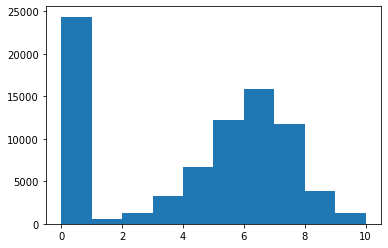

In [7]:
#visualizar histograma do average_Rating dos gameboards
plt.hist(games["average_rating"])
plt.show()

In [8]:
#verificar as observações com averagerating = 0
games[games["average_rating"] == 0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0


Há duas explicações para o "Average_rating" ser igual a 0. Ou nenhum usuário votou no jogo, ou realmente os usuários nao gostaram do jogo.
Dessa maneira, vamos excluir os jogos que nenhum usuário votou nele.

In [9]:
#excluindo jogos que nenhum usuário votou
games = games.drop(games[games.users_rated == 0].index)
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,56932.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000
mean,64124.321998,1874.770385,2.005041,5.573792,59.908818,57.446057,59.908818,7.592816,231.211305,6.015911,1.653365,374.264754,13.157750,17.990937,60.539486,70.298672,23.533496,1.269279
std,57516.147278,486.079228,0.791646,50.757504,406.324651,393.074343,406.324651,4.868998,1363.681366,1.578552,2.645948,1786.432000,46.970226,71.961726,284.070672,338.267232,138.008185,1.213857
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16145.750000,1989.000000,2.000000,2.000000,15.000000,15.000000,15.000000,4.000000,2.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,36955.500000,2005.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,7.000000,6.150000,0.000000,20.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000
75%,118610.000000,2011.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,39.000000,7.039372,5.488010,125.000000,6.000000,6.000000,15.000000,19.000000,5.000000,2.000000
max,184260.000000,2017.000000,40.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [10]:
#removendo linhas com valores NaN
games = games.dropna(axis=0)

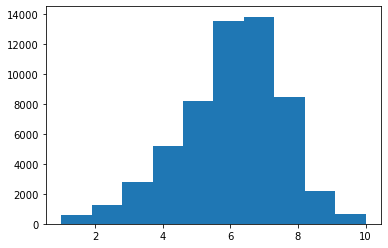

In [11]:
#visualizar histograma da average_Rating
plt.hist(games["average_rating"])
plt.show()

In [12]:
#correlacao entre as variaveis com a variavel target ("average_rating")
games.corr()["average_rating"]

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [13]:
#fazer uma lista com os nomes das colunas
colunas = games.columns.to_list()

In [14]:
#excluindo colunas irrelevantes no processo de treinamento do modelo
colunas = [c for c in colunas if c not in ["bayes_average_rating", "average_rating", "type", "name"]]

In [15]:
# Preparando a variável target, a que será prevista
target = "average_rating"

In [16]:
# Gerando os dados de treino
df_treino = games.sample(frac = 0.8, random_state = 101)

In [17]:
# Seleciona tudo que não está no dataset de treino e armazena no dataset de teste
df_teste = games.loc[~games.index.isin(df_treino.index)]

In [18]:
# Shape dos datasets
print(df_treino.shape)
print(df_teste.shape)

(45515, 20)
(11379, 20)


In [19]:
# Criando um regressor Random Forest
reg_v1 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 101)

In [20]:
# Criando o modelo
modelo = reg_v1.fit(df_treino[colunas], df_treino[target])

In [21]:
# Fazendo previsões
previsoes = modelo.predict(df_teste[colunas])

In [24]:
# Computando o erro
from sklearn.metrics import mean_squared_error
mean_squared_error(previsoes, df_teste[target])

1.3954102582085597

In [25]:
#calculando metrica R^2
metrics.r2_score(df_teste[target], previsoes)

0.43362135838894944